In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csv_file_path = r"C:\Users\USER\OneDrive\Documents\raw_data.csv"
df = pd.read_csv(csv_file_path)
df.dropna(inplace=True) 
df.columns = df.columns.str.strip()
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
df['EVM Votes'] = pd.to_numeric(df['EVM Votes'], errors='coerce')
df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')
df['Percent Votes'] = pd.to_numeric(df['Percent Votes'], errors='coerce')
print(df.head())
print(df.info())

   Sr No                      State  \
0      1  Andaman & Nicobar Islands   
1      2  Andaman & Nicobar Islands   
2      3  Andaman & Nicobar Islands   
3      4  Andaman & Nicobar Islands   
4      5  Andaman & Nicobar Islands   

                                        Constituency      Candidate Name  \
0  Parliamentary  Constituency  1 - Andaman & Nic...     BISHNU PADA RAY   
1  Parliamentary  Constituency  1 - Andaman & Nic...  KULDEEP RAI SHARMA   
2  Parliamentary  Constituency  1 - Andaman & Nic...          MANOJ PAUL   
3  Parliamentary  Constituency  1 - Andaman & Nic...          D AYYAPPAN   
4  Parliamentary  Constituency  1 - Andaman & Nic...     V.K. ABDUL AZIZ   

                            Party Name  EVM Votes  Postal Votes  Total Votes  \
0               Bharatiya Janata Party   102182.0         254.0     102436.0   
1             Indian National Congress    77829.0         211.0      78040.0   
2  Andaman Nicobar Democratic Congress     8236.0          18.0     

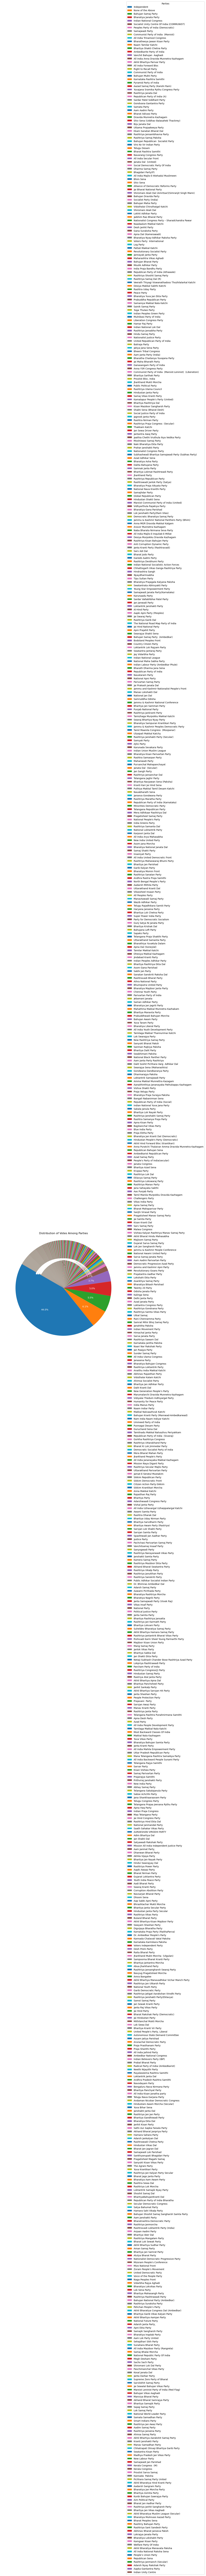

In [13]:
plt.figure(figsize=(10, 8)) #Distribution of Votes Among Parties (Pie Chart)
party_counts = df['Party Name'].value_counts()
wedges, texts, autotexts = plt.pie(party_counts, autopct='%1.1f%%', startangle=150, textprops=dict(color="w"))
plt.legend(wedges, party_counts.index, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Votes Among Parties')
plt.axis('equal')
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)
plt.show()

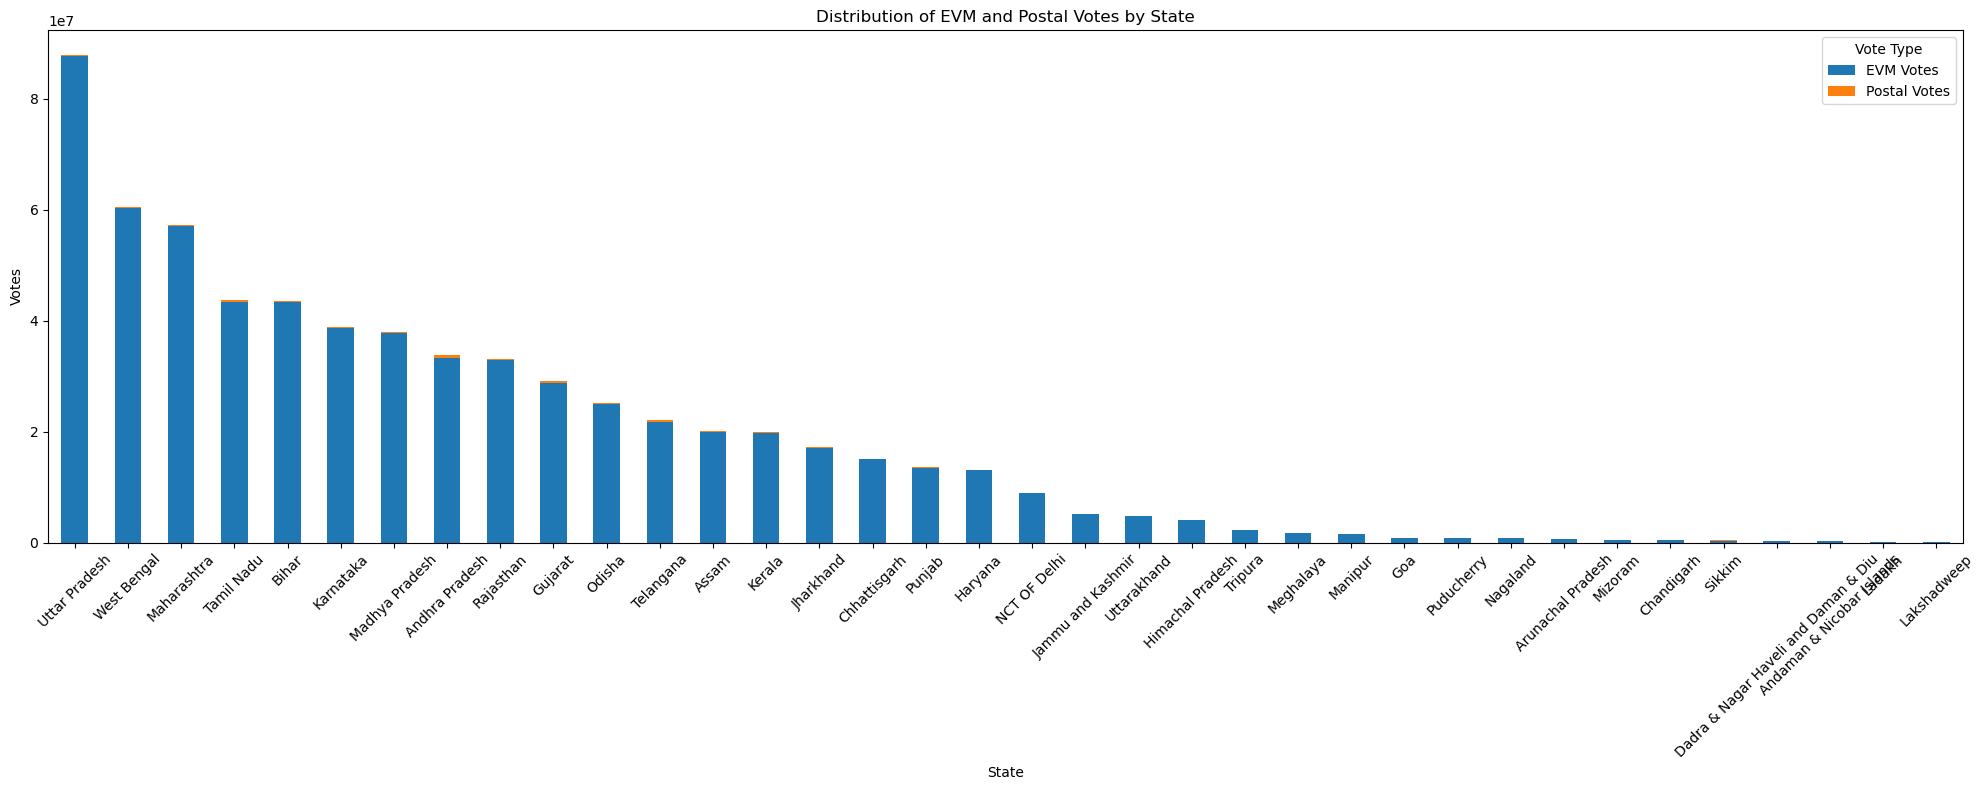

In [14]:
#Distribution of EVM and Postal Votes by State (Stacked Bar Chart)
state_votes_evmpostal = df.groupby('State')[['EVM Votes', 'Postal Votes']].sum()
state_votes_evmpostal.sort_values(by='EVM Votes', ascending=False, inplace=True)
state_votes_evmpostal.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('State')
plt.ylabel('Votes')
plt.title('Distribution of EVM and Postal Votes by State')
plt.xticks(rotation=45)
plt.legend(title='Vote Type')
plt.tight_layout()
plt.show()

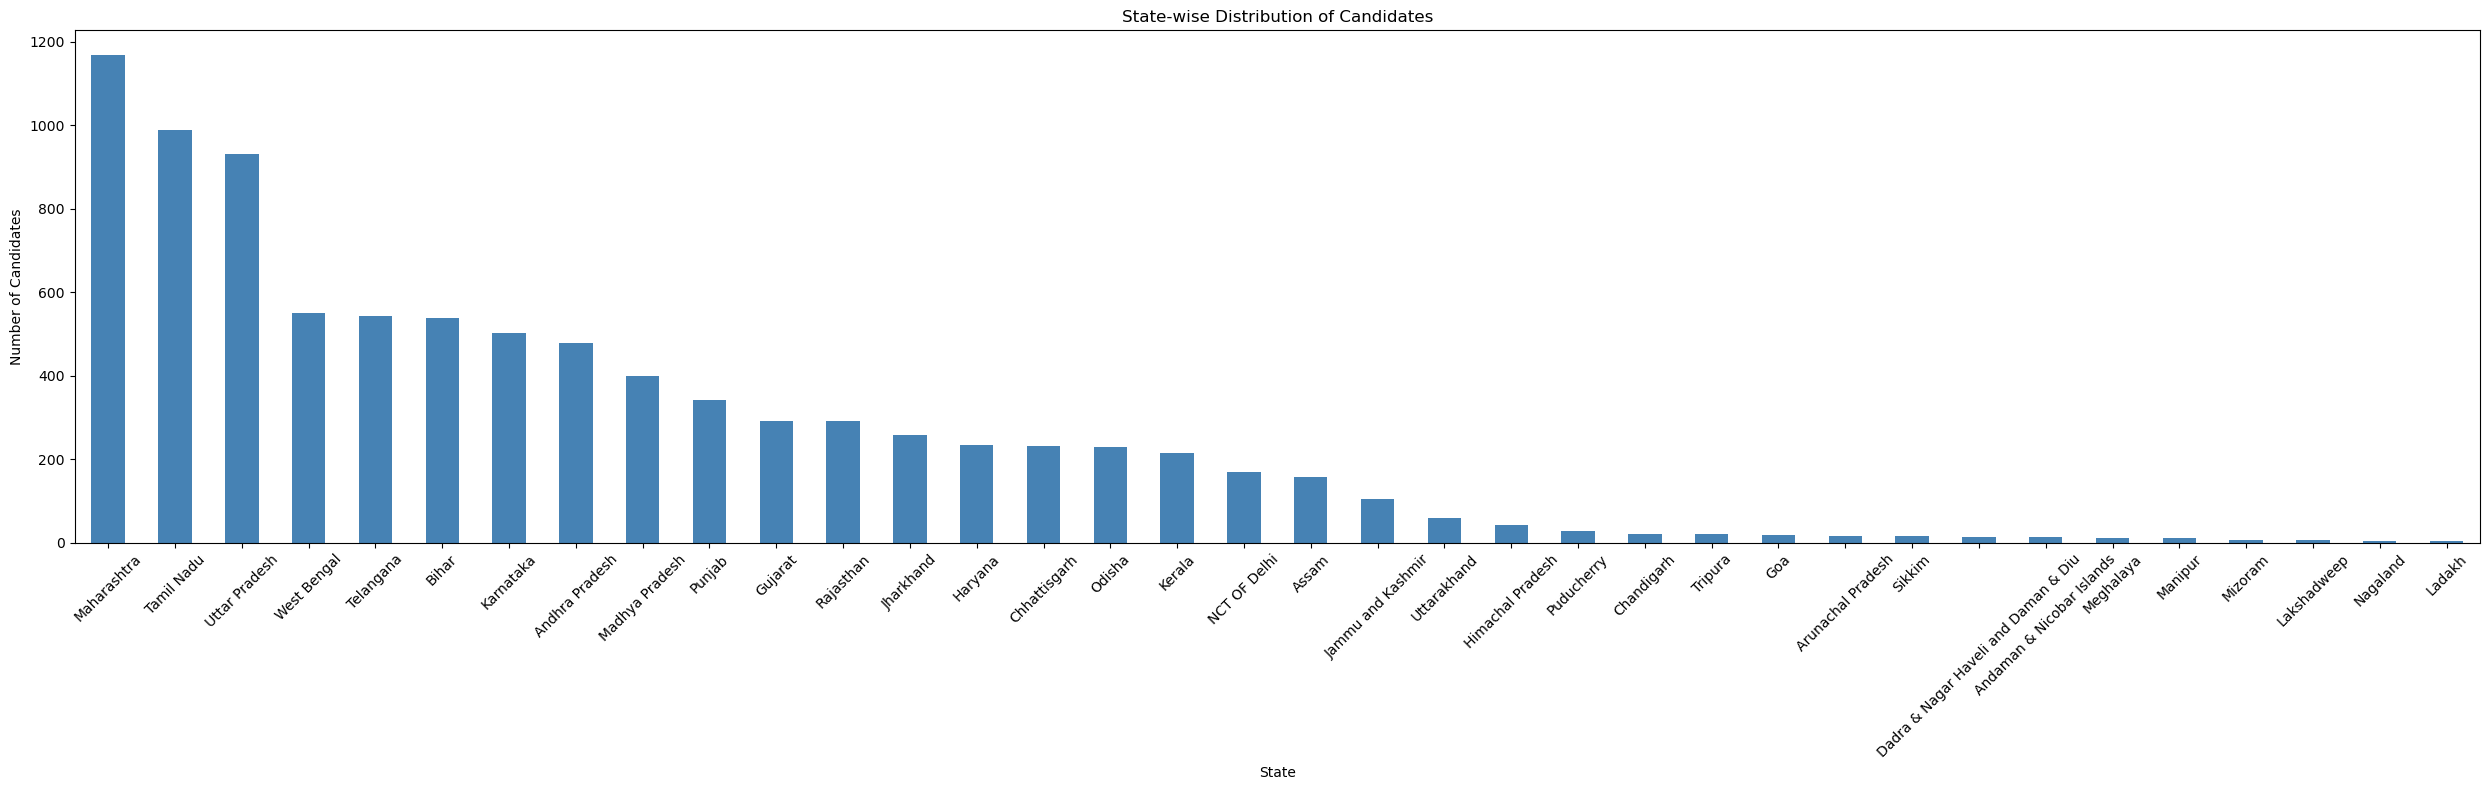

In [15]:
#State-wise distribution of candidates (Bar Chart)
state_candidate_counts = df['State'].value_counts()
plt.figure(figsize=(25, 8))
state_candidate_counts.plot(kind='bar', color='steelblue')
plt.xlabel('State')
plt.ylabel('Number of Candidates')
plt.title('State-wise Distribution of Candidates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

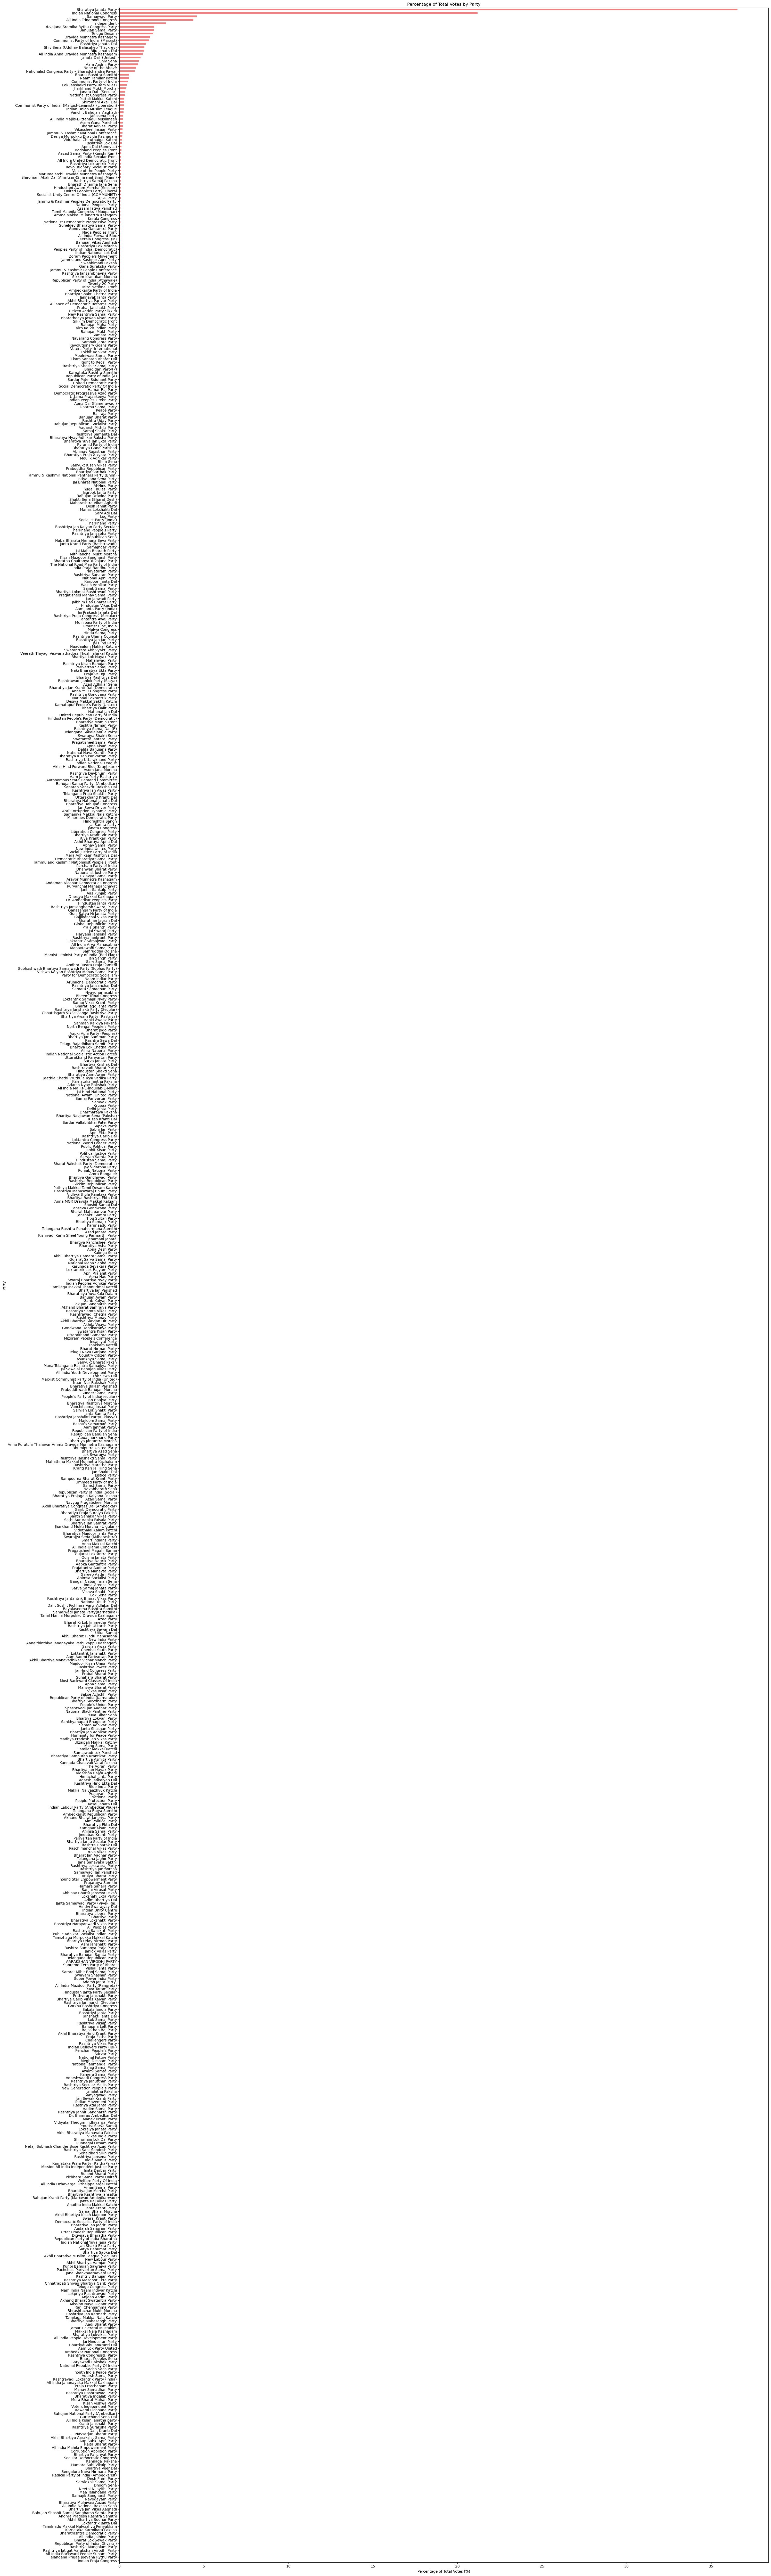

In [16]:
#Percentage of total votes received by each party (using bar chart)
party_votes_percentage = (df.groupby('Party Name')['Total Votes'].sum() / df['Total Votes'].sum()) * 100
plt.figure(figsize=(30, 100))
party_votes_percentage.sort_values().plot(kind='barh', color='lightcoral')
plt.xlabel('Percentage of Total Votes (%)')
plt.ylabel('Party')
plt.title('Percentage of Total Votes by Party')
plt.tight_layout()
plt.show()

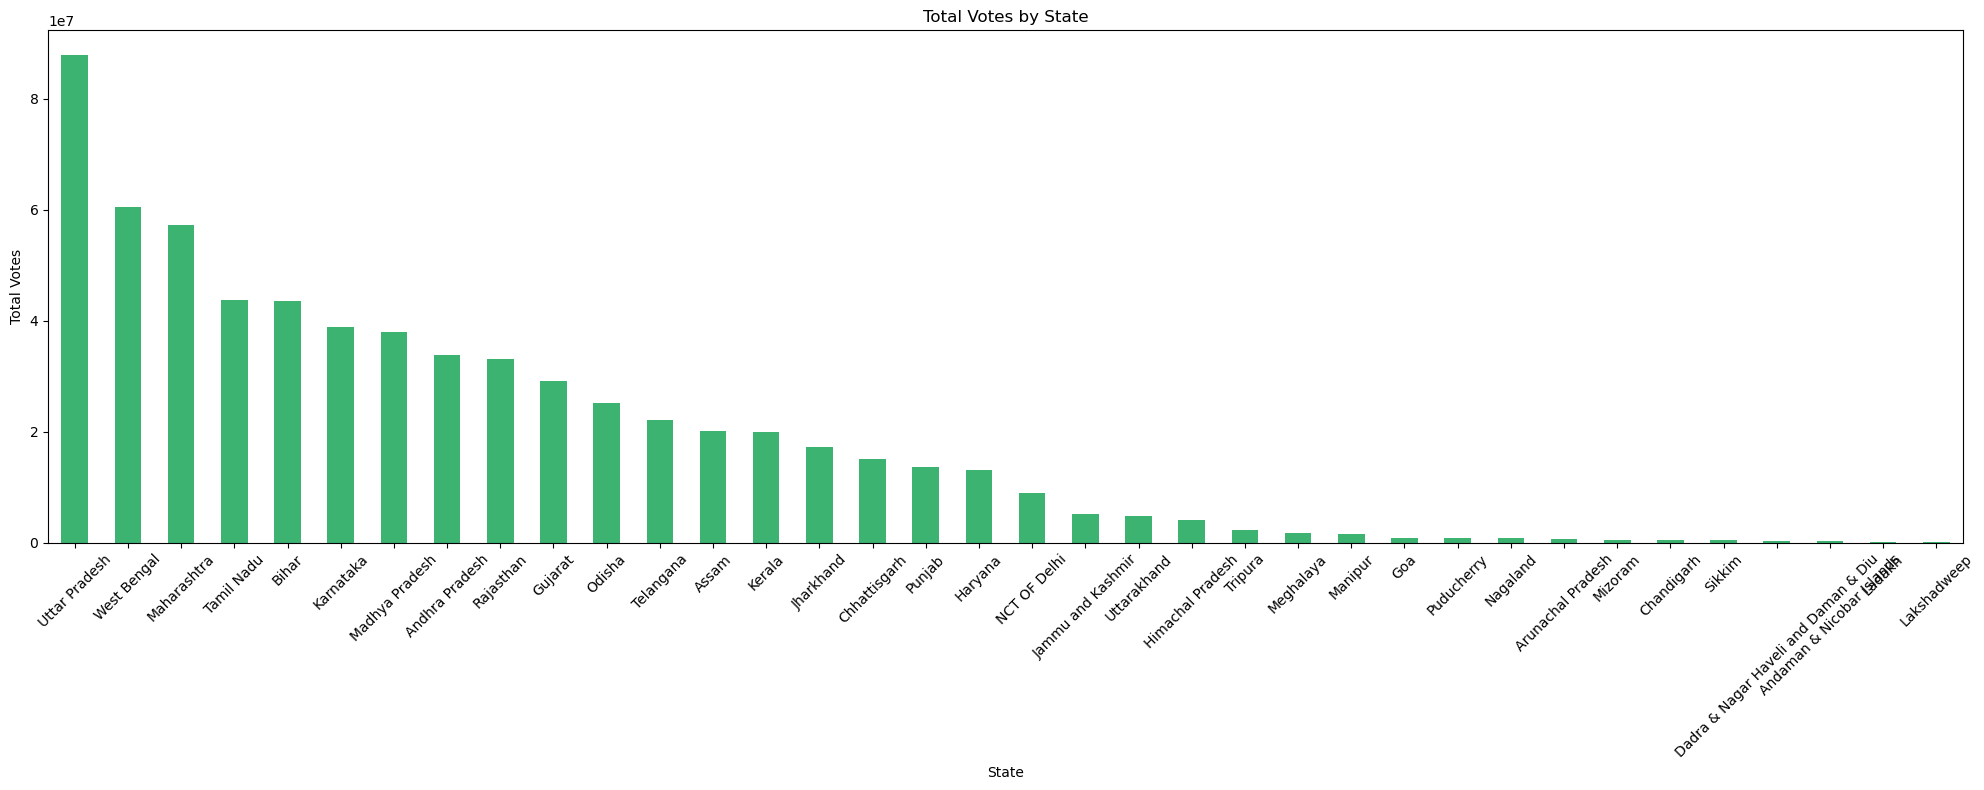

In [17]:
#State-wise analysis of votes (using grouped bar chart)
state_votes = df.groupby('State')['Total Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(20, 8))
state_votes.plot(kind='bar', color='mediumseagreen')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.title('Total Votes by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
def load_and_clean_data(file_path):
    try:
        df = pd.read_csv(file_path)
        df.dropna(inplace=True)  # Drop rows with any missing values
        df.columns = df.columns.str.strip()  # Strip any leading/trailing whitespaces from column names
        df['EVM Votes'] = pd.to_numeric(df['EVM Votes'], errors='coerce')
        df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')
        df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
        df['Percent Votes'] = pd.to_numeric(df['Percent Votes'], errors='coerce')
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print("Error: No data found in the file.")
        return None
    except pd.errors.ParserError:
        print("Error: Parsing the data.")
        return None

In [10]:
# Function to generate insights
def generate_insights(df):
    insights = []
    # Insight 1: Total number of constituencies
    total_constituencies = df['Constituency'].nunique()
    insights.append(f"1. Total number of constituencies: {total_constituencies}\n")
    # Insight 2: Total number of parties
    total_parties = df['Party Name'].nunique()
    insights.append(f"2. Total number of parties: {total_parties}\n")
    # Insight 3: Party with the most candidates
    most_candidates_party = df['Party Name'].value_counts().idxmax()
    most_candidates_count = df['Party Name'].value_counts().max()
    insights.append(f"3. Party with the most candidates: {most_candidates_party} ({most_candidates_count} candidates)\n")
    # Insight 4: Constituency with the highest total votes
    highest_votes_constituency = df.loc[df['Total Votes'].idxmax(), 'Constituency']
    highest_votes = df['Total Votes'].max()
    insights.append(f"4. Constituency with the highest total votes: {highest_votes_constituency} ({highest_votes} votes)\n")
    # Insight 5: Total votes across all constituencies
    total_votes = df['Total Votes'].sum()
    insights.append(f"5. Total votes across all constituencies: {total_votes}\n")
    # Insight 6: Average votes per party
    average_votes_per_party = df.groupby('Party Name')['Total Votes'].mean()
    insights.append(f"6. Average votes per party:\n{average_votes_per_party}\n")
    # Insight 7: Constituency with the highest EVM votes
    highest_evm_constituency = df.loc[df['EVM Votes'].idxmax(), 'Constituency']
    highest_evm_votes = df['EVM Votes'].max()
    insights.append(f"7. Constituency with the highest EVM votes: {highest_evm_constituency} ({highest_evm_votes} EVM votes)\n")
    # Insight 8: Distribution of votes by vote type
    evm_total = df['EVM Votes'].sum()
    postal_total = df['Postal Votes'].sum()
    insights.append(f"8. Distribution of votes:\nEVM Votes: {evm_total}\nPostal Votes: {postal_total}\n")
    # Insight 9: Percentage of total votes by state
    state_votes_percentage = (df.groupby('State')['Total Votes'].sum() / df['Total Votes'].sum()) * 100
    insights.append(f"9. Percentage of total votes by state:\n{state_votes_percentage}\n")
    # Insight 10: Voter turnout rate
    eligible_voters = 1000000  # Example: Replace with actual eligible voter count
    voter_turnout_rate = (total_votes / eligible_voters) * 100
    insights.append(f"10. Voter turnout rate: {voter_turnout_rate:.2f}%\n")
    return insights

In [11]:
def main():
    file_path = r"C:\Users\USER\OneDrive\Documents\raw_data.csv"
    df = load_and_clean_data(file_path)
    if df is None:
        return
    insights = generate_insights(df)
    for insight in insights:
        print(insight)
if __name__ == "__main__":
    main()

1. Total number of constituencies: 543

2. Total number of parties: 746

3. Party with the most candidates: Independent (3920 candidates)

4. Constituency with the highest total votes: Parliamentary  Constituency  2 - Dhubri  (Assam)  (1471885.0 votes)

5. Total votes across all constituencies: 645363445.0

6. Average votes per party:
Party Name
AARAKSHAN VIRODHI PARTY                    1444.000000
AJSU Party                               152892.333333
Aadarsh Mithila Party                      9850.000000
Aadarsh Sangram Party                       865.000000
Aadi Bharat Party                           742.000000
                                             ...      
Yuva Krantikari Party                      8736.000000
Yuva Taram Party                            684.500000
Yuva Vikas Party                           1679.000000
Yuvajana Sramika Rythu Congress Party    532641.560000
Zoram People’s Movement                  208552.000000
Name: Total Votes, Length: 746, dtype: float64
